# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler
from keras.models import Sequential
from keras.layers import Dense
import seaborn as sns
import matplotlib.pyplot as plt

# Dataset Overview

**Data Description:**

Y = target attribute (Y) with values indicating 0 (unhappy) and 1 (happy) customers
X1 = my order was delivered on time
X2 = contents of my order was as I expected
X3 = I ordered everything I wanted to order
X4 = I paid a good price for my order
X5 = I am satisfied with my courier
X6 = the app makes ordering easy for me

Attributes X1 to X6 indicate the responses for each question and have values from 1 to 5 where the smaller number indicates less and the higher number indicates more towards the answer.

In [2]:
# Load the dataset
df = pd.read_csv("ACME-HappinessSurvey2020.csv")

# Display basic info like number of rows and columns, column names, and data types
print("Basic Information")
print(df.info())

Basic Information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Y       126 non-null    int64
 1   X1      126 non-null    int64
 2   X2      126 non-null    int64
 3   X3      126 non-null    int64
 4   X4      126 non-null    int64
 5   X5      126 non-null    int64
 6   X6      126 non-null    int64
dtypes: int64(7)
memory usage: 7.0 KB
None


In [3]:
# Inspect the first few rows of the data
print("\nFirst Few Rows of the Data")
print(df.head())


First Few Rows of the Data
   Y  X1  X2  X3  X4  X5  X6
0  0   3   3   3   4   2   4
1  0   3   2   3   5   4   3
2  1   5   3   3   3   3   5
3  0   5   4   3   3   3   5
4  0   5   4   3   3   3   5


In [4]:
# Get a summary of statistics such as mean, median, min, max etc.
print("\nSummary Statistics")
print(df.describe().T)


Summary Statistics
    count      mean       std  min  25%  50%  75%  max
Y   126.0  0.547619  0.499714  0.0  0.0  1.0  1.0  1.0
X1  126.0  4.333333  0.800000  1.0  4.0  5.0  5.0  5.0
X2  126.0  2.531746  1.114892  1.0  2.0  3.0  3.0  5.0
X3  126.0  3.309524  1.023440  1.0  3.0  3.0  4.0  5.0
X4  126.0  3.746032  0.875776  1.0  3.0  4.0  4.0  5.0
X5  126.0  3.650794  1.147641  1.0  3.0  4.0  4.0  5.0
X6  126.0  4.253968  0.809311  1.0  4.0  4.0  5.0  5.0


In [5]:
# Check for any missing or null values in the dataset
print("\nMissing Values")
print(df.isnull().sum().T)


Missing Values
Y     0
X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
dtype: int64


# Relationship Analysis

In [6]:
# Checking the correlations among variables
print(df.corr().T)

           Y        X1        X2        X3        X4        X5        X6
Y   1.000000  0.280160 -0.024274  0.150838  0.064415  0.224522  0.167669
X1  0.280160  1.000000  0.059797  0.283358  0.087541  0.432772  0.411873
X2 -0.024274  0.059797  1.000000  0.184129  0.114838  0.039996 -0.062205
X3  0.150838  0.283358  0.184129  1.000000  0.302618  0.358397  0.203750
X4  0.064415  0.087541  0.114838  0.302618  1.000000  0.293115  0.215888
X5  0.224522  0.432772  0.039996  0.358397  0.293115  1.000000  0.320195
X6  0.167669  0.411873 -0.062205  0.203750  0.215888  0.320195  1.000000


<Axes: >

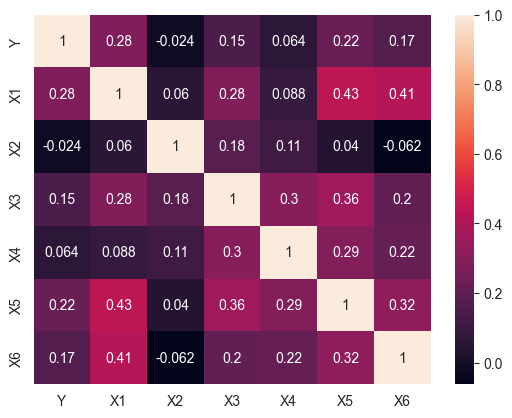

In [7]:
# Using heatmap to visualise the above correlations in an intuitive manner
sns.heatmap(df.corr(), annot=True)

From the heatmap above, we can see that factor X1 ("my order was delivered on time") is the most important factor in contributing to a customer's overall happiness. It is also evident that factors X2 and X4 do not influence the overall satisfaction score as significantly as the other factors do. Thus, we can exclude them from the future questionnaires.

# Model Training

In [8]:
# Preprocess the data
X = df.iloc[:, 1:]
y = df['Y']

In [9]:
# Encode the target variable (0 for unhappy, 1 for happy)
y = np.where(y == 0, 0, 1)

In [10]:
# Standardise feature values
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [11]:
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)

In [12]:
# Build the neural network model
model = Sequential()
model.add(Dense(64, input_dim=6, activation='sigmoid'))
model.add(Dense(16, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

In [13]:
# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [14]:
# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/50
4/4 [==============================] - 1s 51ms/step - loss: 0.6933 - accuracy: 0.5487 - val_loss: 0.6942 - val_accuracy: 0.5385
Epoch 2/50
4/4 [==============================] - 0s 9ms/step - loss: 0.6892 - accuracy: 0.5487 - val_loss: 0.6895 - val_accuracy: 0.5385
Epoch 3/50
4/4 [==============================] - 0s 10ms/step - loss: 0.6884 - accuracy: 0.5487 - val_loss: 0.6862 - val_accuracy: 0.5385
Epoch 4/50
4/4 [==============================] - 0s 9ms/step - loss: 0.6861 - accuracy: 0.5487 - val_loss: 0.6832 - val_accuracy: 0.5385
Epoch 5/50
4/4 [==============================] - 0s 9ms/step - loss: 0.6848 - accuracy: 0.5487 - val_loss: 0.6804 - val_accuracy: 0.5385
Epoch 6/50
4/4 [==============================] - 0s 9ms/step - loss: 0.6834 - accuracy: 0.5487 - val_loss: 0.6776 - val_accuracy: 0.5385
Epoch 7/50
4/4 [==============================] - 0s 9ms/step - loss: 0.6816 - accuracy: 0.5575 - val_loss: 0.6751 - val_accuracy: 0.5385
Epoch 8/50
4/4 [================

In [15]:
# Evaluate the model on the validation set
loss, accuracy = model.evaluate(X_val, y_val)
print(f'Validation Loss: {loss:.4f}, Validation Accuracy: {accuracy:.4f}')

1/1 [==============================] - 0s 21ms/step - loss: 0.5974 - accuracy: 0.7692
Validation Loss: 0.5974, Validation Accuracy: 0.7692


# Model Explanation

- **Architecture**
    - The model is constructed using a sequential API, which allows layers to be added in a step-by-step manner.
    - The model consists of three layers. The choice of layers and neurons is crucial as it defines the model's capacity to learn patterns from the data.

- **How is the Model Built?**
    - Our model is like a multi-layered filter. Information passes through multiple stages, getting refined at each level to make a final prediction.

- **Understanding the Layers**
    - **Input Layer:** This is where we input our information, such as various factors that might influence happiness.
    - **Hidden Layer:** Think of this as a refining stage. The model takes the input, processes it, and starts identifying patterns or relationships.
    - **Output Layer:** Based on the learned patterns, the model makes a final decision, predicting happiness as either likely or unlikely.

- **Why these Components?**
    - Every piece, from layers to evaluation, is tailored to ensure that the model learns effectively and makes accurate, useful predictions.
    - The choices in building the model, such as the number of layers and how they are structured, are like the settings that we tune to get the best performance out of it.

- **Performance Evaluation**
    - As per the final validation accuracy on the test dataset, our model has an overall accuracy rate of 76.92%.